<a href="https://colab.research.google.com/github/hongkwangpyo/2020_deep_learning/blob/master/0811_4_keras_RNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils

In [2]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

2113536/2110848 [==============================] - 0s 0us/step


In [4]:
category = np.max(y_train) + 1

In [5]:
print(category, '카테고리수')
print(len(x_train), '학습용 뉴스 기사수')
print(len(x_test), '테스트용 뉴스 기사수')
print(x_train[0])

46 카테고리수
8982 학습용 뉴스 기사수
2246 테스트용 뉴스 기사수
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [6]:
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

In [7]:
len(x_train[0])

100

In [8]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
len(y_train[0])

46

In [9]:
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh')) # sigmoid : 0-1사이의 값(확률) , tanh : -1~1사이의 값(음수의 범위를 더 증폭시킨다)
model.add(Dense(46, activation='softmax'))

In [10]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [11]:
hist = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
90/90 [==============================] - 4s 41ms/step - loss: 2.5636 - accuracy: 0.3657 - val_loss: 2.1754 - val_accuracy: 0.4849
Epoch 2/20
90/90 [==============================] - 3s 35ms/step - loss: 2.0467 - accuracy: 0.4938 - val_loss: 1.9955 - val_accuracy: 0.5111
Epoch 3/20
90/90 [==============================] - 3s 35ms/step - loss: 1.9545 - accuracy: 0.5094 - val_loss: 2.0129 - val_accuracy: 0.4546
Epoch 4/20
90/90 [==============================] - 3s 35ms/step - loss: 1.8597 - accuracy: 0.5226 - val_loss: 1.7690 - val_accuracy: 0.5654
Epoch 5/20
90/90 [==============================] - 3s 34ms/step - loss: 1.7619 - accuracy: 0.5474 - val_loss: 1.7197 - val_accuracy: 0.5632
Epoch 6/20
90/90 [==============================] - 3s 34ms/step - loss: 1.6419 - accuracy: 0.5798 - val_loss: 1.7201 - val_accuracy: 0.5543
Epoch 7/20
90/90 [==============================] - 3s 34ms/step - loss: 1.6209 - accuracy: 0.5813 - val_loss: 1.6266 - val_accuracy: 0.5890
Epoch 8/20
90

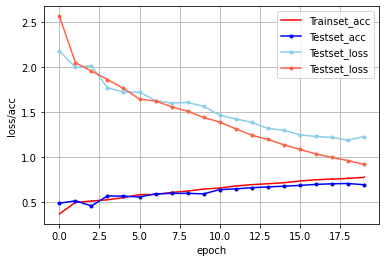

In [15]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
y_vloss = hist.history['val_loss']
y_loss = hist.history['loss']

x_len = np.arange(len(acc))
plt.plot(x_len, acc, marker=',', c='r', label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c='b', label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c='skyblue', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='tomato', label='Testset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()

In [14]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 1s 11ms/step - loss: 1.2253 - accuracy: 0.6906


[1.2252604961395264, 0.6905609965324402]